In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in our csv to create a DataFrame
df = pd.read_csv('data/raw_data/statcast_batter_stats_2023_2025.csv')
df.head()

,"last_name, first_name",player_id,year,player_age,pa,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,woba,avg_swing_speed,avg_swing_length,attack_angle,attack_direction,vertical_swing_path,exit_velocity_avg,barrel_batted_rate,hard_hit_percent,avg_best_speed,iz_contact_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,sprint_speed
0,"Heineman, Tyler",623168,2025,34,51,19.6,3.9,0.396,0.542,0.412,0.954,0.412,65.5,7.0,7.9,-12.8,27.8,85.0,5.1,28.2,96.700958,86.9,58.6,46.2,30.8,23.1,26.1
1,"Hoerner, Nico",663538,2024,27,641,10.3,6.9,0.273,0.373,0.335,0.708,0.313,68.2,7.1,4.9,-1.4,32.7,85.7,1.2,27.6,95.980927,92.7,48.4,33.3,37.4,29.3,28.4
2,"Alvarez, Yordan",670541,2024,27,635,15.0,10.9,0.308,0.567,0.392,0.959,0.402,76.5,7.6,8.8,-6.0,35.1,93.1,14.5,49.7,104.097105,88.5,47.8,36.4,38.4,25.2,26.1
3,"Altuve, Jose",514888,2024,34,682,17.4,6.9,0.295,0.439,0.350,0.789,0.344,69.4,7.8,16.5,-4.1,30.2,86.5,6.5,31.2,97.323673,86.5,51.5,51.3,34.6,14.1,27.1
4,"Thomas, Alek",677950,2024,24,103,16.5,6.8,0.189,0.358,0.245,0.603,0.262,70.9,7.1,10.8,-0.3,29.2,91.2,7.6,46.8,101.335203,83.1,49.2,44.3,35.4,20.3,27.8


In [3]:
# Rename the columns to make them more concise and consistant
df = df.rename(columns={
    "last_name, first_name": "name",
    "on_base_plus_slg": "ops",
    "batting_avg": "ba",
    "avg_swing_speed": "swing_speed",
    "avg_swing_length": "swing_length",
    "exit_velocity_avg": "EV",
    "avg_best_speed": "EV50",
    "barrel_batted_rate": "barrel%",
    "on_base_percent": "obp",
    "k_percent": "k%",
    "bb_percent": "bb%",
    "player_age": "age",
    "hard_hit_percent": "hard_hit%",
    "iz_contact_percent": "zone_contact%",
    "swing_percent": "swing%",
    "pull_percent": "pull%",
    "straightaway_percent": "straightaway%",
    "pull_percent": "pull%",
    "opposite_percent": "oppo%",
    "year": "season",
    "slg_percent": "slg"
})

df.head()


,name,player_id,season,age,pa,k%,bb%,ba,slg,obp,ops,woba,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,EV,barrel%,hard_hit%,EV50,zone_contact%,swing%,pull%,straightaway%,oppo%,sprint_speed
0,"Heineman, Tyler",623168,2025,34,51,19.6,3.9,0.396,0.542,0.412,0.954,0.412,65.5,7.0,7.9,-12.8,27.8,85.0,5.1,28.2,96.700958,86.9,58.6,46.2,30.8,23.1,26.1
1,"Hoerner, Nico",663538,2024,27,641,10.3,6.9,0.273,0.373,0.335,0.708,0.313,68.2,7.1,4.9,-1.4,32.7,85.7,1.2,27.6,95.980927,92.7,48.4,33.3,37.4,29.3,28.4
2,"Alvarez, Yordan",670541,2024,27,635,15.0,10.9,0.308,0.567,0.392,0.959,0.402,76.5,7.6,8.8,-6.0,35.1,93.1,14.5,49.7,104.097105,88.5,47.8,36.4,38.4,25.2,26.1
3,"Altuve, Jose",514888,2024,34,682,17.4,6.9,0.295,0.439,0.350,0.789,0.344,69.4,7.8,16.5,-4.1,30.2,86.5,6.5,31.2,97.323673,86.5,51.5,51.3,34.6,14.1,27.1
4,"Thomas, Alek",677950,2024,24,103,16.5,6.8,0.189,0.358,0.245,0.603,0.262,70.9,7.1,10.8,-0.3,29.2,91.2,7.6,46.8,101.335203,83.1,49.2,44.3,35.4,20.3,27.8


In [4]:
# Drop the player_id column
df = df.drop(["player_id"], axis=1)

df.head()

,name,season,age,pa,k%,bb%,ba,slg,obp,ops,woba,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,EV,barrel%,hard_hit%,EV50,zone_contact%,swing%,pull%,straightaway%,oppo%,sprint_speed
0,"Heineman, Tyler",2025,34,51,19.6,3.9,0.396,0.542,0.412,0.954,0.412,65.5,7.0,7.9,-12.8,27.8,85.0,5.1,28.2,96.700958,86.9,58.6,46.2,30.8,23.1,26.1
1,"Hoerner, Nico",2024,27,641,10.3,6.9,0.273,0.373,0.335,0.708,0.313,68.2,7.1,4.9,-1.4,32.7,85.7,1.2,27.6,95.980927,92.7,48.4,33.3,37.4,29.3,28.4
2,"Alvarez, Yordan",2024,27,635,15.0,10.9,0.308,0.567,0.392,0.959,0.402,76.5,7.6,8.8,-6.0,35.1,93.1,14.5,49.7,104.097105,88.5,47.8,36.4,38.4,25.2,26.1
3,"Altuve, Jose",2024,34,682,17.4,6.9,0.295,0.439,0.350,0.789,0.344,69.4,7.8,16.5,-4.1,30.2,86.5,6.5,31.2,97.323673,86.5,51.5,51.3,34.6,14.1,27.1
4,"Thomas, Alek",2024,24,103,16.5,6.8,0.189,0.358,0.245,0.603,0.262,70.9,7.1,10.8,-0.3,29.2,91.2,7.6,46.8,101.335203,83.1,49.2,44.3,35.4,20.3,27.8


In [5]:
# Add columns for 'k-bb' and 'iso'
df["k-bb"] = df["k%"] - df["bb%"]
df["iso"] = df["slg"] - df["ba"]
df.head()

,name,season,age,pa,k%,bb%,ba,slg,obp,ops,woba,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,EV,barrel%,hard_hit%,EV50,zone_contact%,swing%,pull%,straightaway%,oppo%,sprint_speed,k-bb,iso
0,"Heineman, Tyler",2025,34,51,19.6,3.9,0.396,0.542,0.412,0.954,0.412,65.5,7.0,7.9,-12.8,27.8,85.0,5.1,28.2,96.700958,86.9,58.6,46.2,30.8,23.1,26.1,15.7,0.146
1,"Hoerner, Nico",2024,27,641,10.3,6.9,0.273,0.373,0.335,0.708,0.313,68.2,7.1,4.9,-1.4,32.7,85.7,1.2,27.6,95.980927,92.7,48.4,33.3,37.4,29.3,28.4,3.4,0.100
2,"Alvarez, Yordan",2024,27,635,15.0,10.9,0.308,0.567,0.392,0.959,0.402,76.5,7.6,8.8,-6.0,35.1,93.1,14.5,49.7,104.097105,88.5,47.8,36.4,38.4,25.2,26.1,4.1,0.259
3,"Altuve, Jose",2024,34,682,17.4,6.9,0.295,0.439,0.350,0.789,0.344,69.4,7.8,16.5,-4.1,30.2,86.5,6.5,31.2,97.323673,86.5,51.5,51.3,34.6,14.1,27.1,10.5,0.144
4,"Thomas, Alek",2024,24,103,16.5,6.8,0.189,0.358,0.245,0.603,0.262,70.9,7.1,10.8,-0.3,29.2,91.2,7.6,46.8,101.335203,83.1,49.2,44.3,35.4,20.3,27.8,9.7,0.169


In [6]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1738 non-null   object 
 1   season               1738 non-null   int64  
 2   age                  1738 non-null   int64  
 3   pa                   1738 non-null   int64  
 4   k%                   1738 non-null   float64
 5   bb%                  1738 non-null   float64
 6   ba                   1738 non-null   float64
 7   slg                  1738 non-null   float64
 8   obp                  1738 non-null   float64
 9   ops                  1738 non-null   float64
 10  woba                 1738 non-null   float64
 11  swing_speed          1671 non-null   float64
 12  swing_length         1671 non-null   float64
 13  attack_angle         1671 non-null   float64
 14  attack_direction     1671 non-null   float64
 15  vertical_swing_path  1671 non-null   f

In [7]:
# Drop all null values
df = df.dropna()

In [8]:
# Check the remaining data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 0 to 1737
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1630 non-null   object 
 1   season               1630 non-null   int64  
 2   age                  1630 non-null   int64  
 3   pa                   1630 non-null   int64  
 4   k%                   1630 non-null   float64
 5   bb%                  1630 non-null   float64
 6   ba                   1630 non-null   float64
 7   slg                  1630 non-null   float64
 8   obp                  1630 non-null   float64
 9   ops                  1630 non-null   float64
 10  woba                 1630 non-null   float64
 11  swing_speed          1630 non-null   float64
 12  swing_length         1630 non-null   float64
 13  attack_angle         1630 non-null   float64
 14  attack_direction     1630 non-null   float64
 15  vertical_swing_path  1630 non-null   float6

In [9]:
# Seperate the full season data and drop all players with less than 400 plate appearances
df23_24 = df[(df["season"] == 2023) | (df["season"] == 2024) & (df["pa"] >=450)]
df23_24

,name,season,age,pa,k%,bb%,ba,slg,obp,ops,woba,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,EV,barrel%,hard_hit%,EV50,zone_contact%,swing%,pull%,straightaway%,oppo%,sprint_speed,k-bb,iso
1,"Hoerner, Nico",2024,27,641,10.3,6.9,0.273,0.373,0.335,0.708,0.313,68.2,7.1,4.9,-1.4,32.7,85.7,1.2,27.6,95.980927,92.7,48.4,33.3,37.4,29.3,28.4,3.4,0.100
2,"Alvarez, Yordan",2024,27,635,15.0,10.9,0.308,0.567,0.392,0.959,0.402,76.5,7.6,8.8,-6.0,35.1,93.1,14.5,49.7,104.097105,88.5,47.8,36.4,38.4,25.2,26.1,4.1,0.259
3,"Altuve, Jose",2024,34,682,17.4,6.9,0.295,0.439,0.350,0.789,0.344,69.4,7.8,16.5,-4.1,30.2,86.5,6.5,31.2,97.323673,86.5,51.5,51.3,34.6,14.1,27.1,10.5,0.144
5,"Garcia, Maikel",2024,24,626,16.5,6.7,0.231,0.332,0.281,0.613,0.270,70.8,7.2,4.6,4.6,28.3,90.4,3.7,42.8,100.050927,88.5,43.4,29.7,41.2,29.1,27.9,9.8,0.101
6,"Peralta, David",2023,35,422,17.1,4.7,0.259,0.381,0.294,0.675,0.290,72.1,7.3,5.2,-1.7,31.8,89.3,4.9,44.2,100.838135,84.7,54.5,38.4,35.7,25.9,27.0,12.4,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,"Arenado, Nolan",2024,33,635,14.5,6.9,0.272,0.394,0.325,0.719,0.314,70.7,8.2,11.3,-7.4,33.3,86.3,3.2,31.6,96.924148,90.2,46.8,44.2,37.3,18.5,25.3,7.6,0.122
1726,"Bauers, Jake",2023,27,272,34.9,9.9,0.202,0.413,0.279,0.692,0.297,75.1,7.8,14.1,-4.3,35.4,89.1,18.7,48.7,102.011643,75.6,45.8,41.3,35.3,23.3,27.3,25.0,0.211
1728,"Burleson, Alec",2024,25,595,12.8,5.9,0.269,0.420,0.314,0.734,0.319,71.2,7.5,9.6,1.4,33.4,89.7,6.5,41.7,99.381927,86.5,55.7,33.5,38.7,27.8,25.5,6.9,0.151
1733,"Ellis, Drew",2023,27,29,24.1,20.7,0.217,0.478,0.379,0.857,0.373,71.8,7.5,15.9,-14.1,31.2,90.7,18.8,37.5,99.800157,82.5,39.1,81.3,12.5,6.3,27.2,3.4,0.261


In [10]:
# Drop all players in current season with less than 150 plate appearances
df25 = df[(df["season"] == 2025) & (df["pa"] >=150)]
df25

,name,season,age,pa,k%,bb%,ba,slg,obp,ops,woba,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,EV,barrel%,hard_hit%,EV50,zone_contact%,swing%,pull%,straightaway%,oppo%,sprint_speed,k-bb,iso
11,"Clement, Ernie",2025,29,171,14.0,5.8,0.245,0.310,0.292,0.602,0.270,66.7,7.1,12.6,-3.1,32.3,86.8,2.2,23.5,95.438810,91.3,53.4,39.0,36.8,24.3,28.4,8.2,0.065
12,"Frelick, Sal",2025,25,209,12.0,8.1,0.294,0.401,0.362,0.763,0.341,67.9,7.0,8.3,-1.5,28.9,86.5,3.1,30.7,96.605137,90.0,42.6,41.1,34.4,24.5,28.9,3.9,0.107
14,"Muncy, Max",2025,34,203,24.6,14.8,0.211,0.343,0.335,0.678,0.309,71.5,7.1,18.5,-4.8,34.7,90.4,10.8,50.8,101.526731,82.8,43.4,48.3,35.0,16.7,27.2,9.8,0.132
15,"Aranda, Jonathan",2025,27,189,24.9,10.6,0.315,0.503,0.397,0.900,0.394,70.0,7.3,9.3,4.5,36.1,92.9,11.8,55.5,102.936662,76.8,47.1,37.8,37.0,25.2,25.8,14.3,0.188
34,"Freeman, Freddie",2025,35,192,18.8,10.4,0.359,0.617,0.427,1.044,0.440,69.4,6.9,11.2,0.8,42.6,92.2,11.9,46.3,101.212606,77.8,51.1,40.3,36.6,23.1,25.7,8.4,0.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,"Torkelson, Spencer",2025,25,231,24.7,13.0,0.238,0.513,0.351,0.864,0.369,73.0,7.8,14.4,-8.3,39.6,91.2,14.4,46.0,101.058444,81.3,44.2,46.8,29.5,23.7,26.5,11.7,0.275
1729,"McCutchen, Andrew",2025,38,192,17.7,13.5,0.253,0.358,0.361,0.719,0.326,70.9,7.7,15.7,-1.9,34.1,89.0,9.3,41.9,99.750533,80.0,44.2,45.0,34.1,20.9,27.2,4.2,0.105
1731,"Lindor, Francisco",2025,31,255,17.6,7.8,0.269,0.448,0.341,0.789,0.343,70.4,7.5,10.9,-1.0,34.0,89.9,7.7,41.5,100.570300,83.2,48.4,43.2,36.6,20.2,27.3,9.8,0.179
1732,"Rice, Ben",2025,26,188,23.9,8.5,0.242,0.521,0.330,0.851,0.367,74.3,7.5,11.5,-6.8,34.2,94.5,19.0,57.9,105.091763,83.0,45.2,50.4,29.8,19.8,27.4,15.4,0.279


In [11]:
# Combine the new data into a single cleaned DataFrame
# Drop all players with OPS below .600
df_cleaned = pd.concat([df23_24, df25], axis=0)
df_cleaned = df_cleaned[(df_cleaned["ops"]) >=.600]
df_cleaned

,name,season,age,pa,k%,bb%,ba,slg,obp,ops,woba,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,EV,barrel%,hard_hit%,EV50,zone_contact%,swing%,pull%,straightaway%,oppo%,sprint_speed,k-bb,iso
1,"Hoerner, Nico",2024,27,641,10.3,6.9,0.273,0.373,0.335,0.708,0.313,68.2,7.1,4.9,-1.4,32.7,85.7,1.2,27.6,95.980927,92.7,48.4,33.3,37.4,29.3,28.4,3.4,0.100
2,"Alvarez, Yordan",2024,27,635,15.0,10.9,0.308,0.567,0.392,0.959,0.402,76.5,7.6,8.8,-6.0,35.1,93.1,14.5,49.7,104.097105,88.5,47.8,36.4,38.4,25.2,26.1,4.1,0.259
3,"Altuve, Jose",2024,34,682,17.4,6.9,0.295,0.439,0.350,0.789,0.344,69.4,7.8,16.5,-4.1,30.2,86.5,6.5,31.2,97.323673,86.5,51.5,51.3,34.6,14.1,27.1,10.5,0.144
5,"Garcia, Maikel",2024,24,626,16.5,6.7,0.231,0.332,0.281,0.613,0.270,70.8,7.2,4.6,4.6,28.3,90.4,3.7,42.8,100.050927,88.5,43.4,29.7,41.2,29.1,27.9,9.8,0.101
6,"Peralta, David",2023,35,422,17.1,4.7,0.259,0.381,0.294,0.675,0.290,72.1,7.3,5.2,-1.7,31.8,89.3,4.9,44.2,100.838135,84.7,54.5,38.4,35.7,25.9,27.0,12.4,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,"Espinal, Santiago",2025,30,177,10.2,7.9,0.270,0.325,0.328,0.653,0.296,68.0,7.3,6.0,-1.0,34.1,86.4,0.7,25.5,96.057704,92.3,43.5,35.9,35.9,28.3,27.0,2.3,0.055
1724,"Torkelson, Spencer",2025,25,231,24.7,13.0,0.238,0.513,0.351,0.864,0.369,73.0,7.8,14.4,-8.3,39.6,91.2,14.4,46.0,101.058444,81.3,44.2,46.8,29.5,23.7,26.5,11.7,0.275
1729,"McCutchen, Andrew",2025,38,192,17.7,13.5,0.253,0.358,0.361,0.719,0.326,70.9,7.7,15.7,-1.9,34.1,89.0,9.3,41.9,99.750533,80.0,44.2,45.0,34.1,20.9,27.2,4.2,0.105
1731,"Lindor, Francisco",2025,31,255,17.6,7.8,0.269,0.448,0.341,0.789,0.343,70.4,7.5,10.9,-1.0,34.0,89.9,7.7,41.5,100.570300,83.2,48.4,43.2,36.6,20.2,27.3,9.8,0.179


In [12]:
# Feature Selection
features = ['swing_speed', 'swing_length',
            'attack_angle', 'attack_direction', 'vertical_swing_path',
            'sprint_speed', 'barrel%', 'EV50', 'hard_hit%', 'zone_contact%', 'swing%', 'k-bb', 'iso', 'ops']
df2 = df_cleaned.loc[:, features]
df2.head()

,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,barrel%,EV50,hard_hit%,zone_contact%,swing%,k-bb,iso,ops
1,68.2,7.1,4.9,-1.4,32.7,28.4,1.2,95.980927,27.6,92.7,48.4,3.4,0.100,0.708
2,76.5,7.6,8.8,-6.0,35.1,26.1,14.5,104.097105,49.7,88.5,47.8,4.1,0.259,0.959
3,69.4,7.8,16.5,-4.1,30.2,27.1,6.5,97.323673,31.2,86.5,51.5,10.5,0.144,0.789
5,70.8,7.2,4.6,4.6,28.3,27.9,3.7,100.050927,42.8,88.5,43.4,9.8,0.101,0.613
6,72.1,7.3,5.2,-1.7,31.8,27.0,4.9,100.838135,44.2,84.7,54.5,12.4,0.122,0.675


In [13]:
# A high level overview of our features
df2.describe()

,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,barrel%,EV50,hard_hit%,zone_contact%,swing%,k-bb,iso,ops
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,71.530000,7.324875,10.193625,-1.80875,32.474750,27.328125,8.7880,100.051699,40.414500,82.323250,47.576750,13.794625,0.170781,0.749733
std,2.797357,0.401211,3.622489,4.36863,3.875669,1.316411,4.5699,2.634902,8.575971,5.651877,5.026302,6.933558,0.058148,0.095817
min,62.400000,5.900000,-3.400000,-28.60000,22.500000,22.800000,0.0000,90.644584,13.600000,60.200000,33.300000,-4.600000,0.000000,0.600000
25%,69.800000,7.100000,7.700000,-4.70000,29.800000,26.400000,5.6000,98.305688,35.375000,78.775000,44.300000,9.200000,0.131000,0.681000
50%,71.700000,7.300000,10.200000,-1.70000,32.400000,27.300000,8.3000,100.123140,40.900000,82.700000,47.600000,13.800000,0.165000,0.739000
75%,73.325000,7.600000,12.700000,0.80000,34.900000,28.300000,11.6250,101.817334,46.300000,86.300000,50.800000,18.200000,0.203000,0.797250
max,81.200000,8.600000,26.700000,10.90000,45.900000,30.500000,27.5000,109.167345,66.700000,96.200000,65.600000,47.100000,0.419000,1.379000


In [14]:
# Preprocessing Pipeline

# Define preprocessing for numeric features 
numeric_features = ['swing_speed', 'swing_length',
            'attack_angle', 'attack_direction', 'vertical_swing_path',
            'sprint_speed', 'barrel%', 'EV50', 'hard_hit%', 'zone_contact%', 'swing%', 'k-bb', 'iso'] 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Correlation Analysis

In [15]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df2)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features)

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final['ops'] = df2.ops 
df_final.head()

,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,barrel%,EV50,hard_hit%,zone_contact%,swing%,k-bb,iso,ops
0,-1.191154,-0.560842,-1.462237,0.093623,0.058155,0.814750,-1.661469,-1.545909,-1.495168,1.837132,0.163891,-1.500114,-1.218032,NaN
1,1.777788,0.686166,-0.384955,-0.959997,0.677791,-0.933518,1.250700,1.536276,1.083412,1.093551,0.044444,-1.399093,1.518104,0.708
2,-0.761909,1.184969,1.741985,-0.524806,-0.587298,-0.173402,-0.500981,-1.035990,-1.075128,0.739465,0.781032,-0.475468,-0.460862,0.959
3,-0.261124,-0.311440,-1.545105,1.467911,-1.077843,0.434692,-1.114069,-0.000293,0.278335,1.093551,-0.831499,-0.576490,-1.200824,0.789
4,0.203891,-0.062039,-1.379369,0.024909,-0.174208,-0.249413,-0.851317,0.298656,0.441684,0.420787,1.378266,-0.201267,-0.839447,NaN


In [16]:
# Create a DataFrame to keep track of our correlations
corrs = df_final.corr()
corrs

,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,barrel%,EV50,hard_hit%,zone_contact%,swing%,k-bb,iso,ops
swing_speed,1.000000,0.570045,0.070789,-0.144482,-0.115955,0.045344,0.651289,0.817373,0.716515,-0.437297,0.096908,0.341060,0.518975,-0.026397
swing_length,0.570045,1.000000,0.294981,-0.356556,-0.061757,-0.140142,0.382440,0.413109,0.379925,-0.333514,0.196834,0.284422,0.328653,0.004125
attack_angle,0.070789,0.294981,1.000000,-0.305548,0.360979,-0.143494,0.391516,0.090319,0.153343,-0.414241,0.039672,0.315798,0.314832,0.028768
attack_direction,-0.144482,-0.356556,-0.305548,1.000000,0.097008,0.071536,-0.141940,-0.001632,0.013618,0.019006,-0.055345,-0.075911,-0.231251,-0.012876
vertical_swing_path,-0.115955,-0.061757,0.360979,0.097008,1.000000,-0.034226,0.149783,-0.046025,-0.003980,-0.146431,0.054320,0.130901,0.081873,0.007636
sprint_speed,0.045344,-0.140142,-0.143494,0.071536,-0.034226,1.000000,-0.077640,-0.068775,-0.117224,-0.100446,0.089555,0.178883,-0.009913,-0.044529
barrel%,0.651289,0.382440,0.391516,-0.141940,0.149783,-0.077640,1.000000,0.780162,0.740250,-0.462029,-0.031486,0.278773,0.763075,0.038852
EV50,0.817373,0.413109,0.090319,-0.001632,-0.046025,-0.068775,0.780162,1.000000,0.941957,-0.357572,-0.008429,0.227710,0.563515,0.004574
hard_hit%,0.716515,0.379925,0.153343,0.013618,-0.003980,-0.117224,0.740250,0.941957,1.000000,-0.318338,-0.030327,0.203566,0.565232,0.002279
zone_contact%,-0.437297,-0.333514,-0.414241,0.019006,-0.146431,-0.100446,-0.462029,-0.357572,-0.318338,1.000000,-0.147133,-0.699735,-0.342358,-0.026979


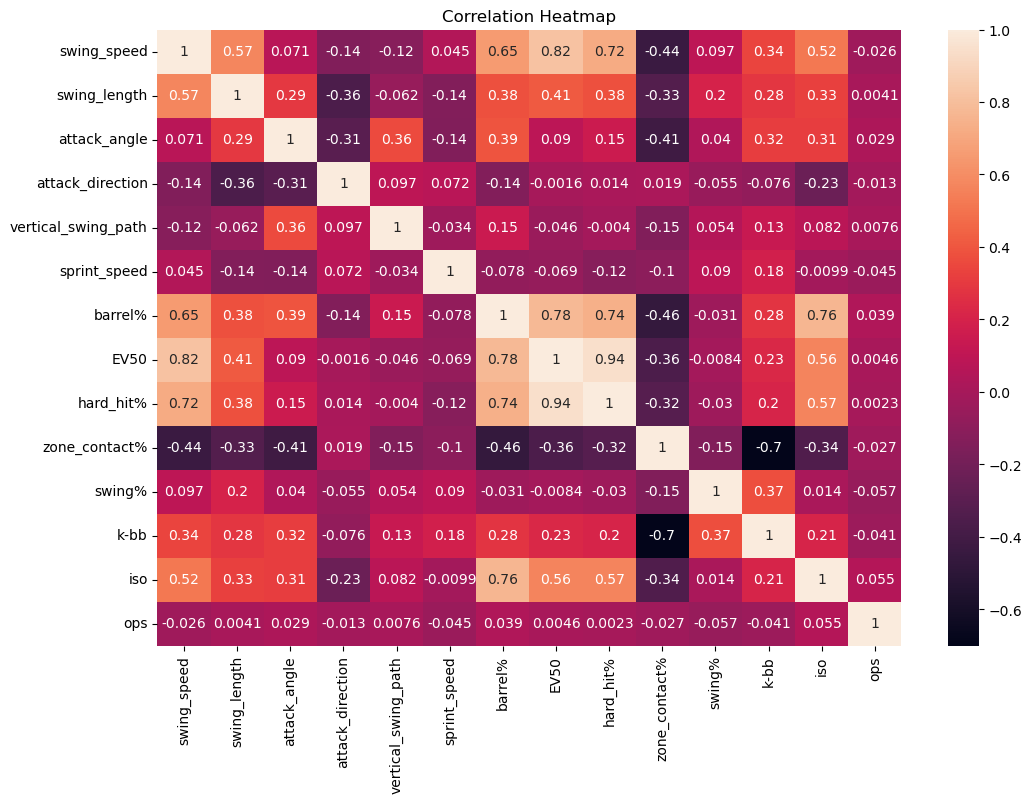

In [17]:
# Let's look at the correlation matrix to get a better understanding of how these features interact with each other
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Rank the feature correspondence relative to ops to get an idea of what our strongest ones are
abs(corrs.ops).sort_values(ascending=False)

ops                    1.000000
swing%                 0.056831
iso                    0.054598
sprint_speed           0.044529
k-bb                   0.041284
barrel%                0.038852
attack_angle           0.028768
zone_contact%          0.026979
swing_speed            0.026397
attack_direction       0.012876
vertical_swing_path    0.007636
EV50                   0.004574
swing_length           0.004125
hard_hit%              0.002279
Name: ops, dtype: float64

# Models

In [19]:
# Step 1: Get the Data
X = df2.drop(columns=["ops"])
y = df2.ops

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(800, 13)
(680, 13)
(120, 13)


In [20]:
X_train.head()

,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,sprint_speed,barrel%,EV50,hard_hit%,zone_contact%,swing%,k-bb,iso
860,70.5,6.7,7.5,2.3,43.7,26.7,11.1,100.590638,42.2,85.7,51.0,6.7,0.236
1060,73.6,8.2,7.7,-2.2,30.4,25.0,13.8,101.506529,40.0,79.5,47.6,17.3,0.186
319,70.6,7.4,15.4,3.5,34.3,28.1,10.2,99.813841,44.0,81.5,52.4,18.1,0.193
1104,73.5,7.3,7.9,-0.1,31.8,26.6,5.1,101.815012,42.3,88.1,50.7,12.9,0.125
589,66.6,6.8,12.6,0.3,32.8,26.5,6.7,97.416252,32.9,86.7,47.7,17.1,0.152


In [21]:
# Function for Regression
def doRegression(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Generate metrics TRAIN
    train_r2 = r2_score(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_rmse = np.sqrt(train_mse)
    
    train_results = f"""TRAIN METRICS
    R2: {train_r2}
    MSE: {train_mse}
    RMSE: {train_rmse}
    MAE: {train_mae}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_r2 = r2_score(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_rmse = np.sqrt(test_mse)
    
    test_results = f"""TEST METRICS
    R2: {test_r2}
    MSE: {test_mse}
    RMSE: {test_rmse}
    MAE: {test_mae}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Predicted vs Actual Plot
    plt.scatter(y_test, test_preds)
    plt.plot(y_test, y_test)
    plt.title("Predicted vs Actual Plot")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()

    # Residual Plot
    resids = test_preds - y_test
    plt.scatter(test_preds, resids)
    plt.hlines(0, min(test_preds), max(test_preds))
    plt.title("Residual Plot")
    plt.xlabel("Predictions")
    plt.ylabel("Residuals")
    plt.show()

TRAIN METRICS
    R2: 0.7242124159938907
    MSE: 0.002615896001519753
    RMSE: 0.051145830734476816
    MAE: 0.03540653323693962
    
TEST METRICS
    R2: 0.58630166475231
    MSE: 0.0030430049619966605
    RMSE: 0.05516343863463064
    MAE: 0.041709382409179895
    


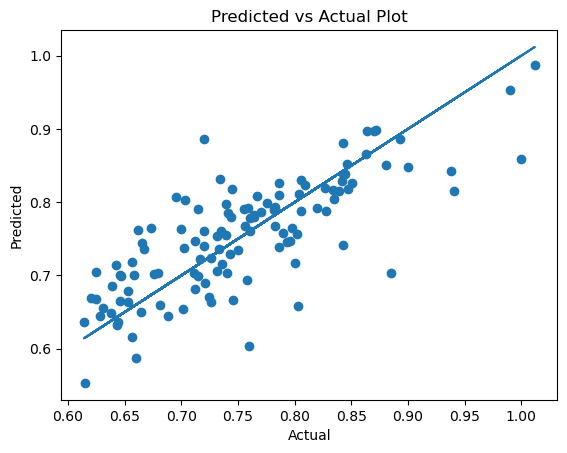

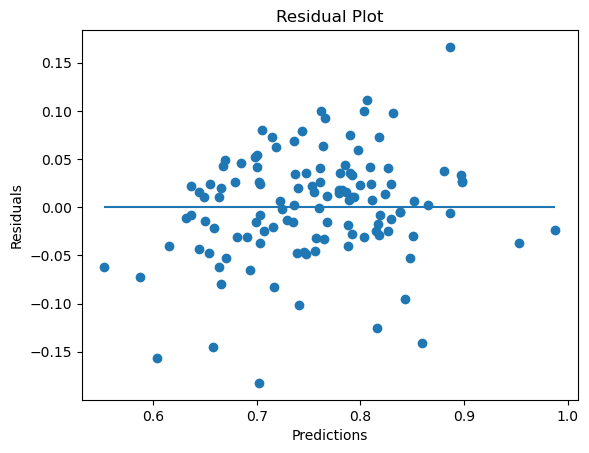

In [22]:
# Attempt 1 Linear Regression
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Do Machine Learning
doRegression(lr, X_train, X_test, y_train, y_test)

### Lin Regresion Actually not bad. A bit of overfitting and the residule plot points to a lot of large misses (+/- 100 points), but the mean rmse is only 55 points of OPS

TRAIN METRICS
    R2: 0.0
    MSE: 0.009485184080882354
    RMSE: 0.0973919097301329
    MAE: 0.07229352941176473
    
TEST METRICS
    R2: -0.003939886007880533
    MSE: 0.007384593541666664
    RMSE: 0.08593365779289663
    MAE: 0.06810583333333334
    


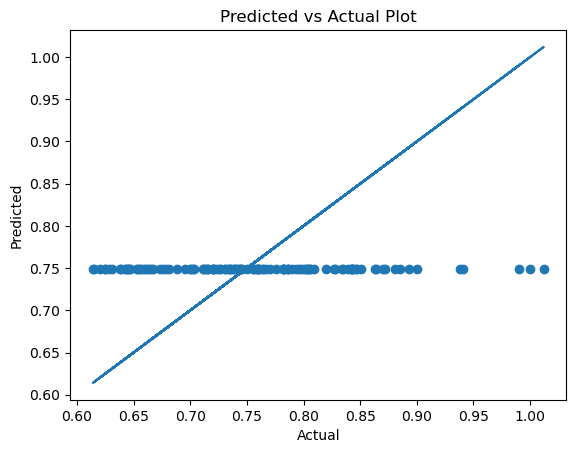

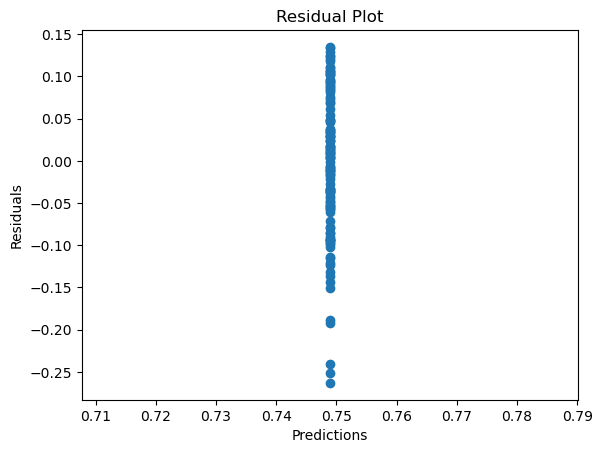

In [23]:
# Attempt 2 Elastic Net
en = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])

# Do Machine Learning
doRegression(en, X_train, X_test, y_train, y_test)

### Elastic Net Compresssed all the data. Overall very bad model

TRAIN METRICS
    R2: 1.0
    MSE: 0.0
    RMSE: 0.0
    MAE: 0.0
    
TEST METRICS
    R2: 0.21066064898980985
    MSE: 0.005806075000000002
    RMSE: 0.0761976049492371
    MAE: 0.05882500000000001
    


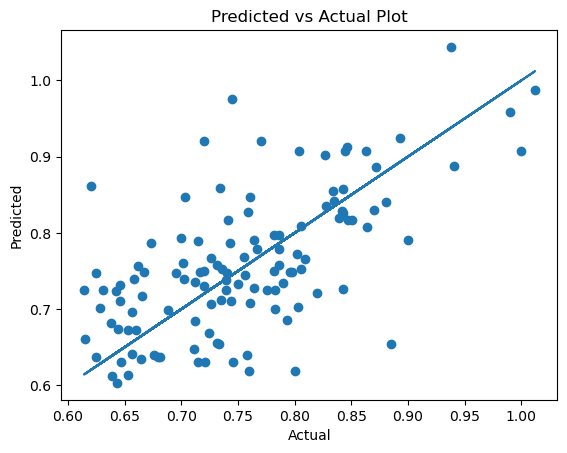

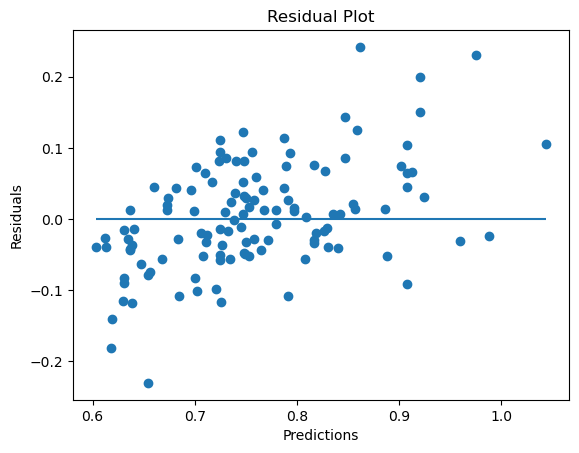

In [24]:
# Attempt 3 Decision Tree
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Do Machine Learning
doRegression(dt, X_train, X_test, y_train, y_test)

### Overfit to a criminal degree

TRAIN METRICS
    R2: 0.9561388952547036
    MSE: 0.00041603065249999833
    RMSE: 0.020396829471758554
    MAE: 0.01432042647058821
    
TEST METRICS
    R2: 0.5510405690831486
    MSE: 0.003302371944999999
    RMSE: 0.057466267888214205
    MAE: 0.04394266666666666
    


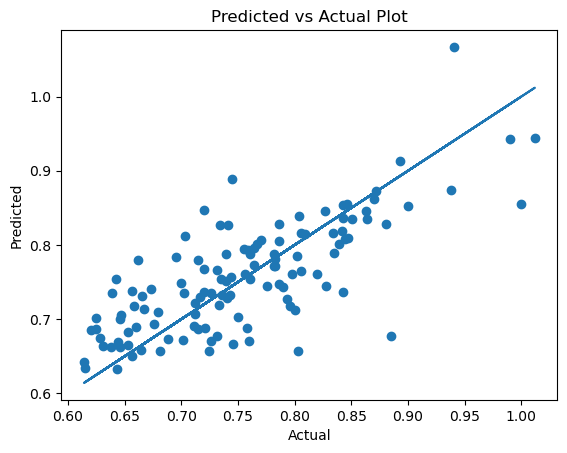

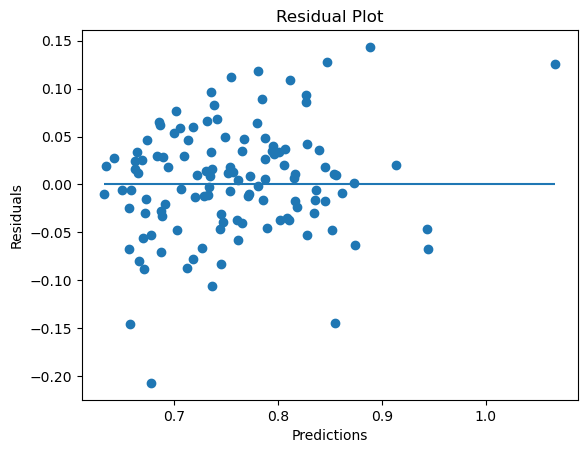

In [25]:
# Attempt 4: Random Forest
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Do Machine Learning
doRegression(rf, X_train, X_test, y_train, y_test)

### Still overfitting to a large degre, while the rsme is on the lower end (57 points of OPS), the residual plot has some very large misses on there in both directions so this appears to be a little misleading

TRAIN METRICS
    R2: 0.7759081334045316
    MSE: 0.0021255526056865493
    RMSE: 0.04610371574706912
    MAE: 0.03801360515151683
    
TEST METRICS
    R2: 0.548730708295049
    MSE: 0.0033193623876506817
    RMSE: 0.0576139079359375
    MAE: 0.046409575846957776
    


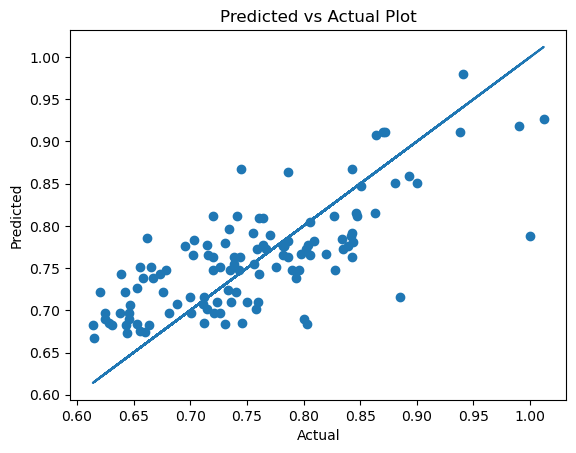

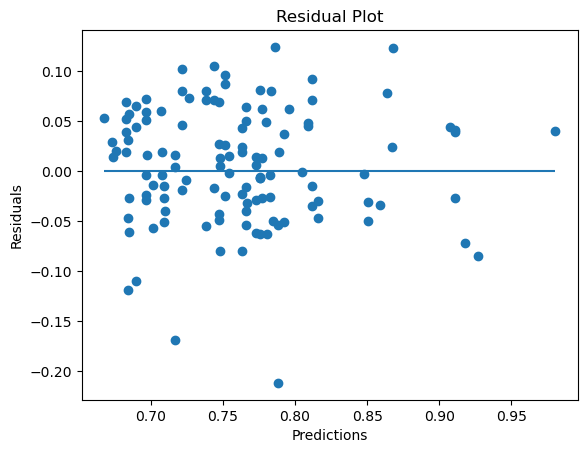

In [26]:
# Attempt 4: AdaBoost
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor(random_state=42))
])

# Do Machine Learning
doRegression(ada, X_train, X_test, y_train, y_test)

### Not overfiting as badly as the other models, but big misses in both directions for all predictions

TRAIN METRICS
    R2: 0.9088633980504429
    MSE: 0.0008644474459976507
    RMSE: 0.02940148713921884
    MAE: 0.022993742862099896
    
TEST METRICS
    R2: 0.6026937555690468
    MSE: 0.0029224310813622005
    RMSE: 0.0540595142538499
    MAE: 0.04153787092916228
    


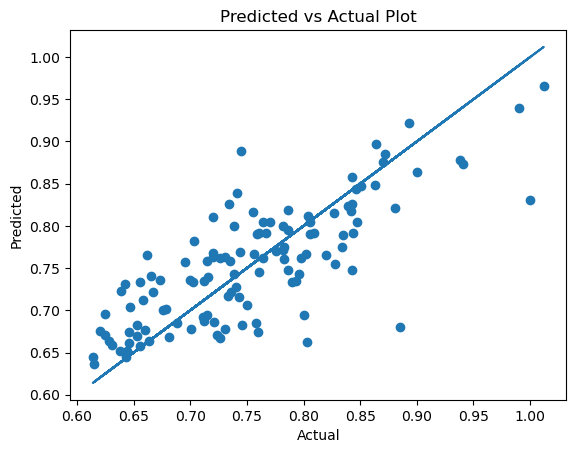

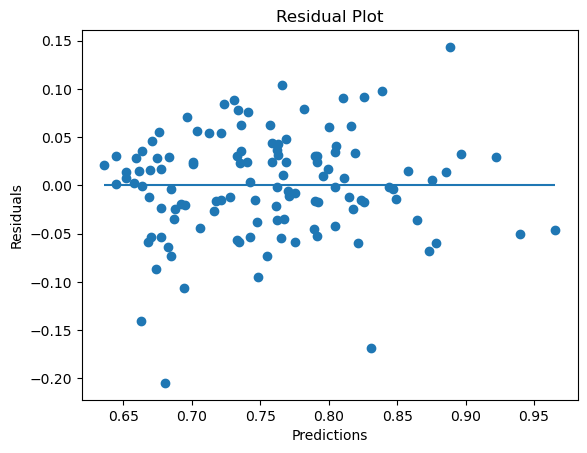

In [27]:
# Attempt 5 GradiantBoost
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Do Machine Learning
doRegression(gb, X_train, X_test, y_train, y_test)

### Overfitting but on the lower end, but rmse is low (54 points of OPS) and predictions are more consistent within the .700 OPS range

# Breaking out the big guns

In [28]:
# Import the neccessary libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

TRAIN METRICS
    R2: 0.9999102417170732
    MSE: 8.513738363448109e-07
    RMSE: 0.0009226992122814513
    MAE: 0.0006467532312168798
    
TEST METRICS
    R2: 0.5399666158475057
    MSE: 0.0033838276623037794
    RMSE: 0.058170676997124415
    MAE: 0.04533337330818176
    


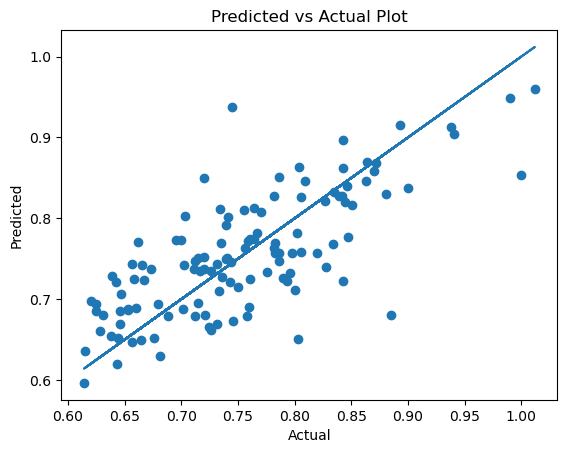

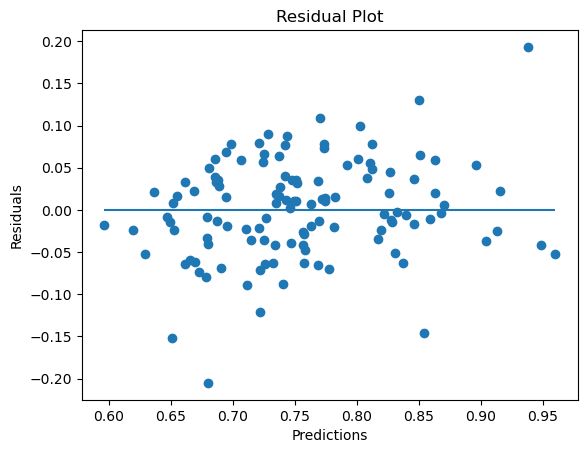

In [29]:
# Attempt 6 XGBRegressor
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Do Machine Learning
doRegression(xgb, X_train, X_test, y_train, y_test)

### Extreme overfit and rmse is on the higher end (58 points of OPS)

TRAIN METRICS
    R2: 0.9569445442366245
    MSE: 0.00040838892360190446
    RMSE: 0.02020863487724751
    MAE: 0.010932430437836576
    
TEST METRICS
    R2: 0.5770544872659921
    MSE: 0.0031110236233685556
    RMSE: 0.055776550837861566
    MAE: 0.04362749479826668
    


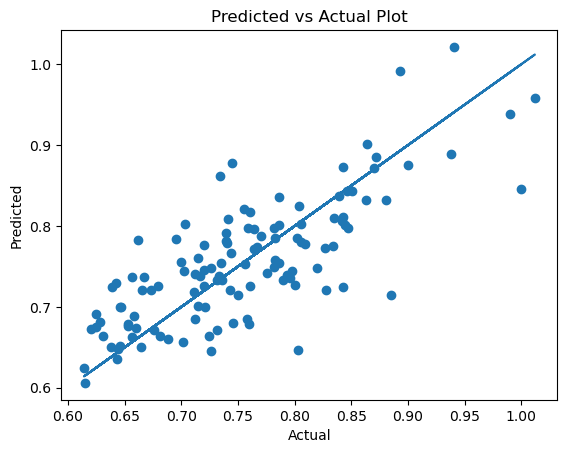

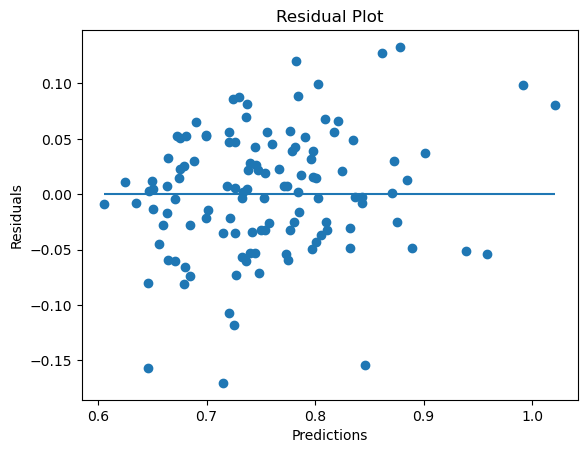

In [30]:
# Attempt 7 LGM
lgb  = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42, verbose=-1))
])

# Do Machine Learning
doRegression(lgb , X_train, X_test, y_train, y_test)

### Similar to the last model

## Conclusion: The Gradient Boosted Regression model offered performed the best under the given parameters

# Model Selection

In [31]:
# Make a new dataframe to analyze feature importance
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['regressor'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
12,iso,0.688944
11,k-bb,0.128151
7,EV50,0.034376
3,attack_direction,0.032411
10,swing%,0.023890
8,hard_hit%,0.020962
4,vertical_swing_path,0.018114
2,attack_angle,0.013004
0,swing_speed,0.011480
5,sprint_speed,0.011464


In [32]:
# RETRAIN ON THE ENTIRE DATASET

# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Do Machine Learning
gb.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['swing_speed',
                                                   'swing_length',
                                                   'attack_angle',
                                                   'attack_direction',
                                                   'vertical_swing_path',
                                                   'sprint_speed', 'barrel%',
                                                   'EV50', 'hard_hit%',
                                                   'zone_contact%', 'swing%',
                                                   'k-bb', 'iso'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [33]:
# Export our model
import pickle

with open("ops_predictor.pkl", "wb") as f:
    pickle.dump(rf, f)

In [34]:
# Fetch a random player season from the original uncleaned dataframe
sample = df.sample(1)
sample = sample.drop(columns="ops")
sample.head()

,name,season,age,pa,k%,bb%,ba,slg,obp,woba,swing_speed,swing_length,attack_angle,attack_direction,vertical_swing_path,EV,barrel%,hard_hit%,EV50,zone_contact%,swing%,pull%,straightaway%,oppo%,sprint_speed,k-bb,iso
19,"Barnhart, Tucker",2024,33,96,32.3,13.5,0.173,0.21,0.287,0.239,67.4,7.4,12.1,-3.6,33.3,83.4,3.8,23.1,94.614894,76.4,40.3,38.5,40.4,21.2,24.4,18.8,0.037


In [35]:
# Run that player's data through the model
with open("ops_predictor.pkl", "rb") as f:
    my_model = pickle.load(f)

my_model.predict(sample)

array([0.64233])

In [37]:
# Using the index number verify the players name, season, and actual OPS
df.loc[19,['name', 'season', 'ops']]

name      Barnhart, Tucker
season                2024
ops                  0.497
Name: 19, dtype: object